# Generated images examples

This notebooks runs the generative pipeline and shows some exemplary
results.

---

In [6]:
import os

cur_dir = os.getcwd()
if os.path.basename(cur_dir) == "notebooks":
    os.chdir(os.path.dirname(cur_dir))

In [8]:
import matplotlib.pyplot as plt

from src.facade_generator.pipeline import SegmentAndTranslate

### Pipeline: generative grammar + pix2pix

This pipeline works as follows:

- generative grammar generates a new segmentation mask
- pix2pix translates the segmentation mask to a facade image

Pictures below presents exemplary outputs (generated segmentation mask on the left, ultimate output on the right)

**WARNING** Due to limitations of our general grammar which builds parse trees from the input data, the correct number of floors in the genrated mask is NOT guaranteed.

**WARNING**

In [9]:
generator = SegmentAndTranslate(
    translation_model_name='pix2pix',
    segmentation_model_name='grammars',
    return_mask=True
)

/home/hb/Dokumenty/pwr/pnw/wrofacade/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Initialized network on cpu
initialize network with normal


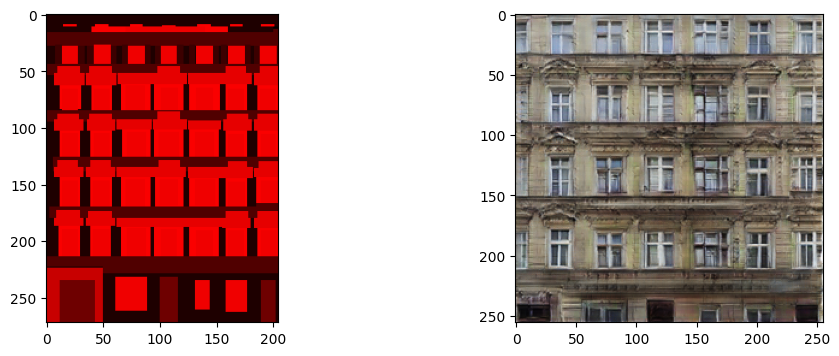

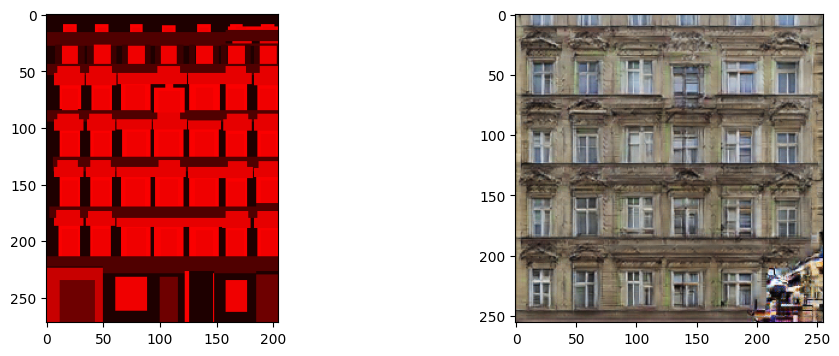

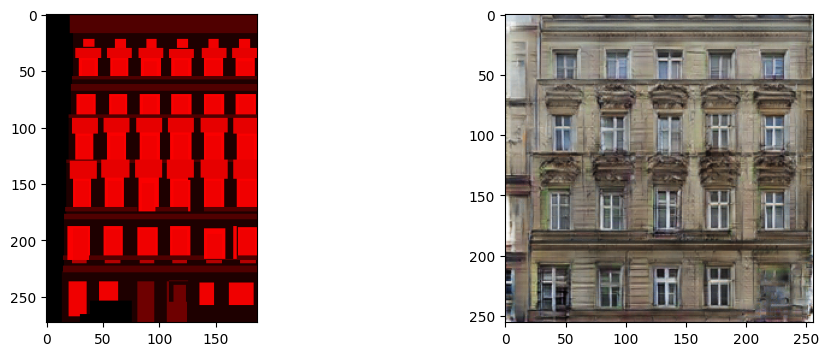

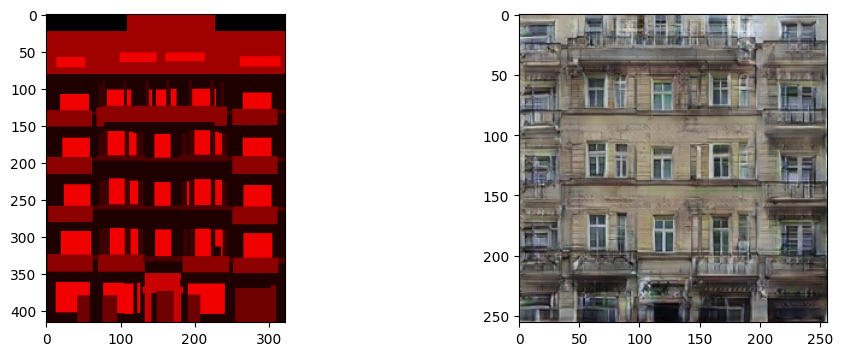

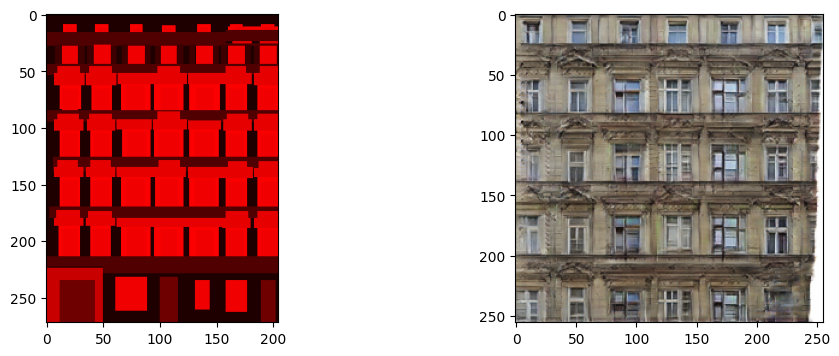

In [10]:
for _ in range(5):
    mask , facade = generator.generate_facade({"n_floors":6})
    fig, axes = plt.subplots(1,2,figsize=(12,4))
    axes[0].imshow(mask.get_rgb_mask())
    axes[1].imshow(facade.numpy())

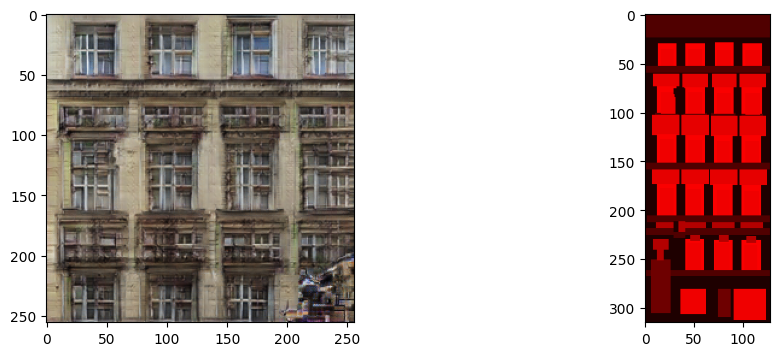

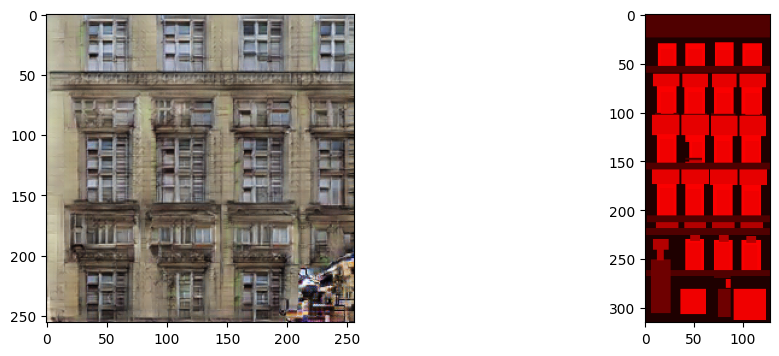

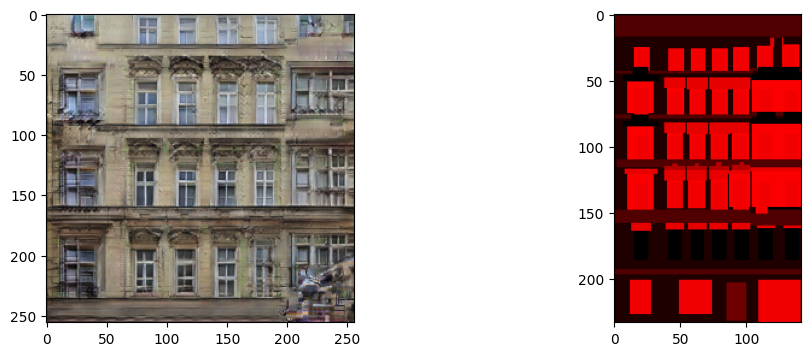

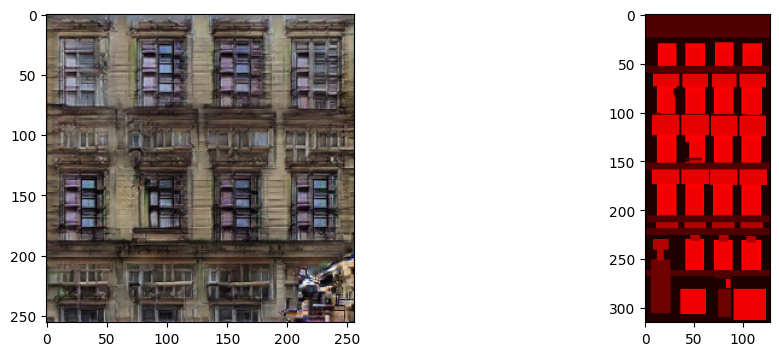

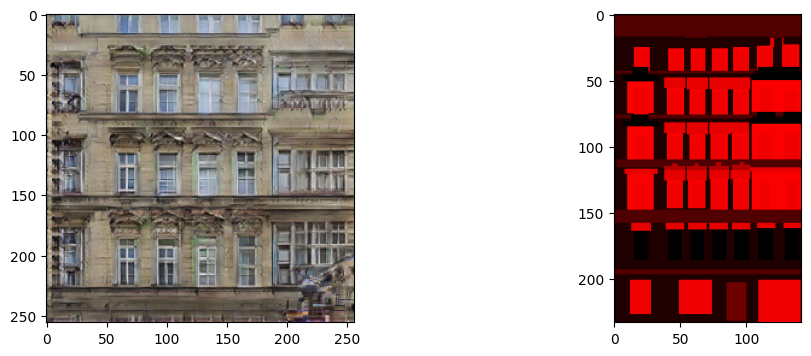

In [11]:
for _ in range(5):
    mask , facade = generator.generate_facade({"min_height_width_ratio":1.5})
    fig, axes = plt.subplots(1,2,figsize=(12,4))
    axes[0].imshow(facade.numpy())
    axes[1].imshow(mask.get_rgb_mask())